## 📌 Step 1: Import Required 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 📌 Step 2: Load the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\Classification\AdaBoost Classification\finance_transactions.csv")

## 📌 Step 3: View First 5 Rows of Dataset

In [3]:
df.head()

,transaction_id,customer_id,customer_age,customer_tenure_months,merchant_category,merchant_country,is_foreign,is_high_risk_country,transaction_type,card_present,transaction_hour,time_of_day,amount,device_score,num_transactions_30d,avg_monthly_spend,days_since_last_tx,new_card,is_fraud
0,2309,442962,26,1,electronics,FR,1,0,online,0,15,afternoon,148.09,0.000,7,1420.95,7,1,0
1,22405,745044,25,18,travel,GB,1,0,in-store,1,14,afternoon,35.44,0.295,7,3008.22,22,0,0
2,23398,847417,26,7,pharmacy,BD,1,1,online,0,23,evening,7.54,0.195,6,3440.71,9,0,0
3,25059,396455,45,37,fashion,PK,0,0,online,0,6,morning,46.59,0.097,5,2188.89,4,0,0
4,2665,427825,42,41,restaurants,PK,0,0,online,0,19,evening,9.71,0.724,8,3234.22,2,0,0


## 📌 Step 4: Check Dataset Shape

In [4]:
df.shape

(30000, 19)

## 📌 Step 5: Drop Unnecessary Columns

In [5]:
df = df.drop(columns=["customer_id"])
df = df.drop(columns=["transaction_id"])

## 📌 Step 6 : Check dataset after Removing Columns

In [6]:
df.head()

,customer_age,customer_tenure_months,merchant_category,merchant_country,is_foreign,is_high_risk_country,transaction_type,card_present,transaction_hour,time_of_day,amount,device_score,num_transactions_30d,avg_monthly_spend,days_since_last_tx,new_card,is_fraud
0,26,1,electronics,FR,1,0,online,0,15,afternoon,148.09,0.000,7,1420.95,7,1,0
1,25,18,travel,GB,1,0,in-store,1,14,afternoon,35.44,0.295,7,3008.22,22,0,0
2,26,7,pharmacy,BD,1,1,online,0,23,evening,7.54,0.195,6,3440.71,9,0,0
3,45,37,fashion,PK,0,0,online,0,6,morning,46.59,0.097,5,2188.89,4,0,0
4,42,41,restaurants,PK,0,0,online,0,19,evening,9.71,0.724,8,3234.22,2,0,0


## 📌 Step 7 : Import Label Encoder

In [7]:
from sklearn.preprocessing import LabelEncoder

## 📌 Step 8 : Apply Label Encoder

In [8]:
le = LabelEncoder()
df["merchant_category"]=pd.DataFrame(le.fit_transform(df["merchant_category"]))
df["merchant_country"]=pd.DataFrame(le.fit_transform(df["merchant_country"]))
df["transaction_type"]=pd.DataFrame(le.fit_transform(df["transaction_type"]))
df["time_of_day"]=pd.DataFrame(le.fit_transform(df["time_of_day"]))

## 📌 Step 9 : Check dataset after appling the label Encoder Columns

In [9]:
df.head()

,customer_age,customer_tenure_months,merchant_category,merchant_country,is_foreign,is_high_risk_country,transaction_type,card_present,transaction_hour,time_of_day,amount,device_score,num_transactions_30d,avg_monthly_spend,days_since_last_tx,new_card,is_fraud
0,26,1,0,5,1,0,2,0,15,0,148.09,0.000,7,1420.95,7,1,0
1,25,18,8,6,1,0,0,1,14,0,35.44,0.295,7,3008.22,22,0,0
2,26,7,5,1,1,1,2,0,23,1,7.54,0.195,6,3440.71,9,0,0
3,45,37,2,10,0,0,2,0,6,2,46.59,0.097,5,2188.89,4,0,0
4,42,41,6,10,0,0,2,0,19,1,9.71,0.724,8,3234.22,2,0,0


## 📌 Step 10: Check Missing Values in Dataset

In [10]:
df.isnull().sum()

customer_age              0
customer_tenure_months    0
merchant_category         0
merchant_country          0
is_foreign                0
is_high_risk_country      0
transaction_type          0
card_present              0
transaction_hour          0
time_of_day               0
amount                    0
device_score              0
num_transactions_30d      0
avg_monthly_spend         0
days_since_last_tx        0
new_card                  0
is_fraud                  0
dtype: int64

## 📌 Step 11:Dataset Information

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_age            30000 non-null  int64  
 1   customer_tenure_months  30000 non-null  int64  
 2   merchant_category       30000 non-null  int64  
 3   merchant_country        30000 non-null  int64  
 4   is_foreign              30000 non-null  int64  
 5   is_high_risk_country    30000 non-null  int64  
 6   transaction_type        30000 non-null  int64  
 7   card_present            30000 non-null  int64  
 8   transaction_hour        30000 non-null  int64  
 9   time_of_day             30000 non-null  int64  
 10  amount                  30000 non-null  float64
 11  device_score            30000 non-null  float64
 12  num_transactions_30d    30000 non-null  int64  
 13  avg_monthly_spend       30000 non-null  float64
 14  days_since_last_tx      30000 non-null

## 📌 Step 12:Statistical Summary 

In [12]:
df.describe()

,customer_age,customer_tenure_months,merchant_category,merchant_country,is_foreign,is_high_risk_country,transaction_type,card_present,transaction_hour,time_of_day,amount,device_score,num_transactions_30d,avg_monthly_spend,days_since_last_tx,new_card,is_fraud
count,30000.000000,30000.000000,30000.00000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000
mean,34.868433,23.726267,4.25150,7.31700,0.749900,0.130567,1.053967,0.397133,11.473267,1.503667,39.940286,0.200918,5.008000,3000.760652,9.532867,0.080200,0.03000
std,10.353207,24.362818,2.83184,3.49006,0.433078,0.336931,0.919429,0.489312,6.927319,1.120310,64.714949,0.129262,2.242641,1465.856639,9.978021,0.271607,0.17059
min,18.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.320000,0.000000,0.000000,50.000000,0.000000,0.000000,0.00000
25%,27.000000,6.000000,2.00000,5.00000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,11.300000,0.105000,3.000000,1986.305000,2.000000,0.000000,0.00000
50%,35.000000,16.000000,4.00000,8.00000,1.000000,0.000000,1.000000,0.000000,11.000000,2.000000,22.530000,0.183000,5.000000,2981.930000,6.000000,0.000000,0.00000
75%,42.000000,33.000000,6.00000,10.00000,1.000000,0.000000,2.000000,1.000000,17.000000,3.000000,45.440000,0.279000,6.000000,4007.255000,14.000000,0.000000,0.00000
max,80.000000,219.000000,9.00000,12.00000,1.000000,1.000000,2.000000,1.000000,23.000000,3.000000,2087.873669,0.840000,15.000000,9363.990000,121.000000,1.000000,1.00000


## 📌 Step 13: Boxplot Visualization

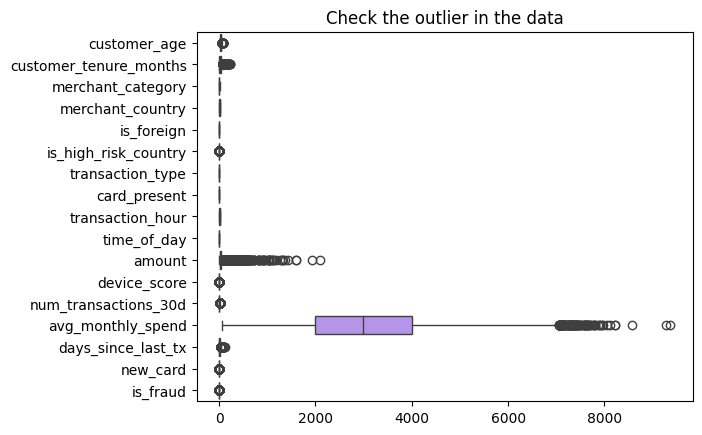

In [13]:
sns.boxplot(data=df,orient='h')
plt.title("Check the outlier in the data")
plt.show()

## 📌 Step 14: Pairplot Visualization

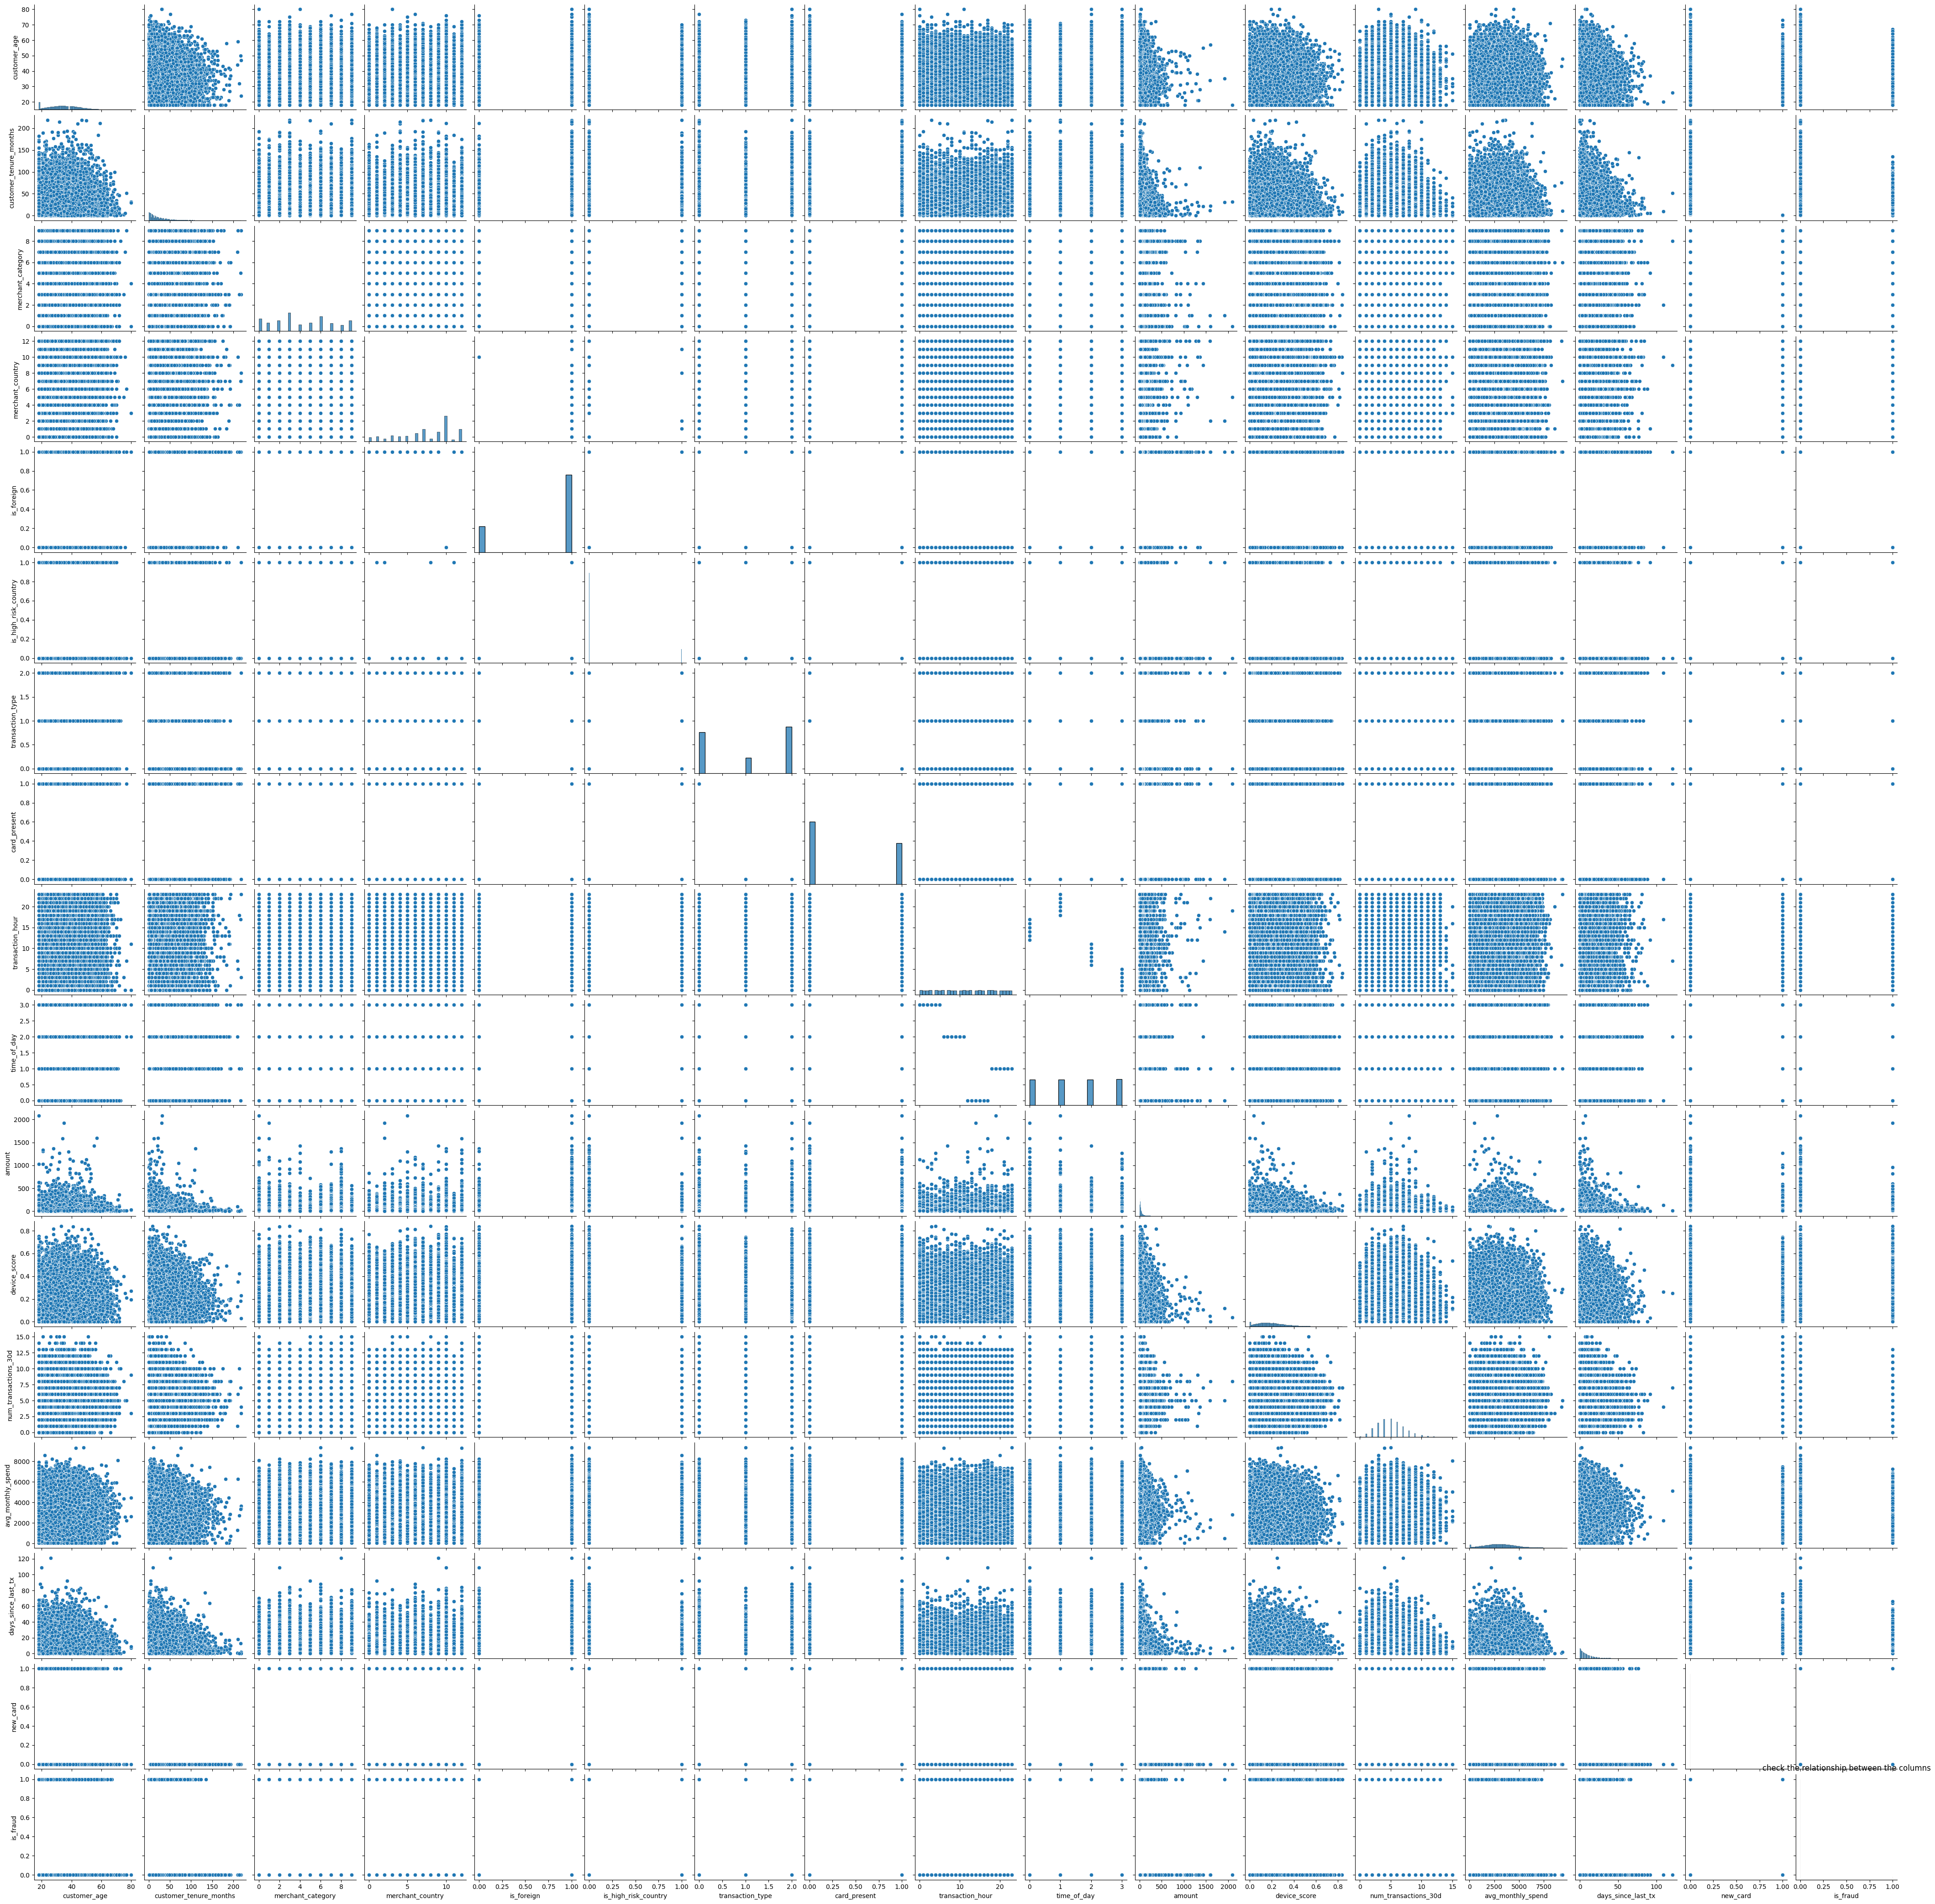

In [14]:
sns.pairplot(data=df)
plt.title("check the relationship between the columns")
plt.show()

## 📌 Step 15: Correlation Heatmap

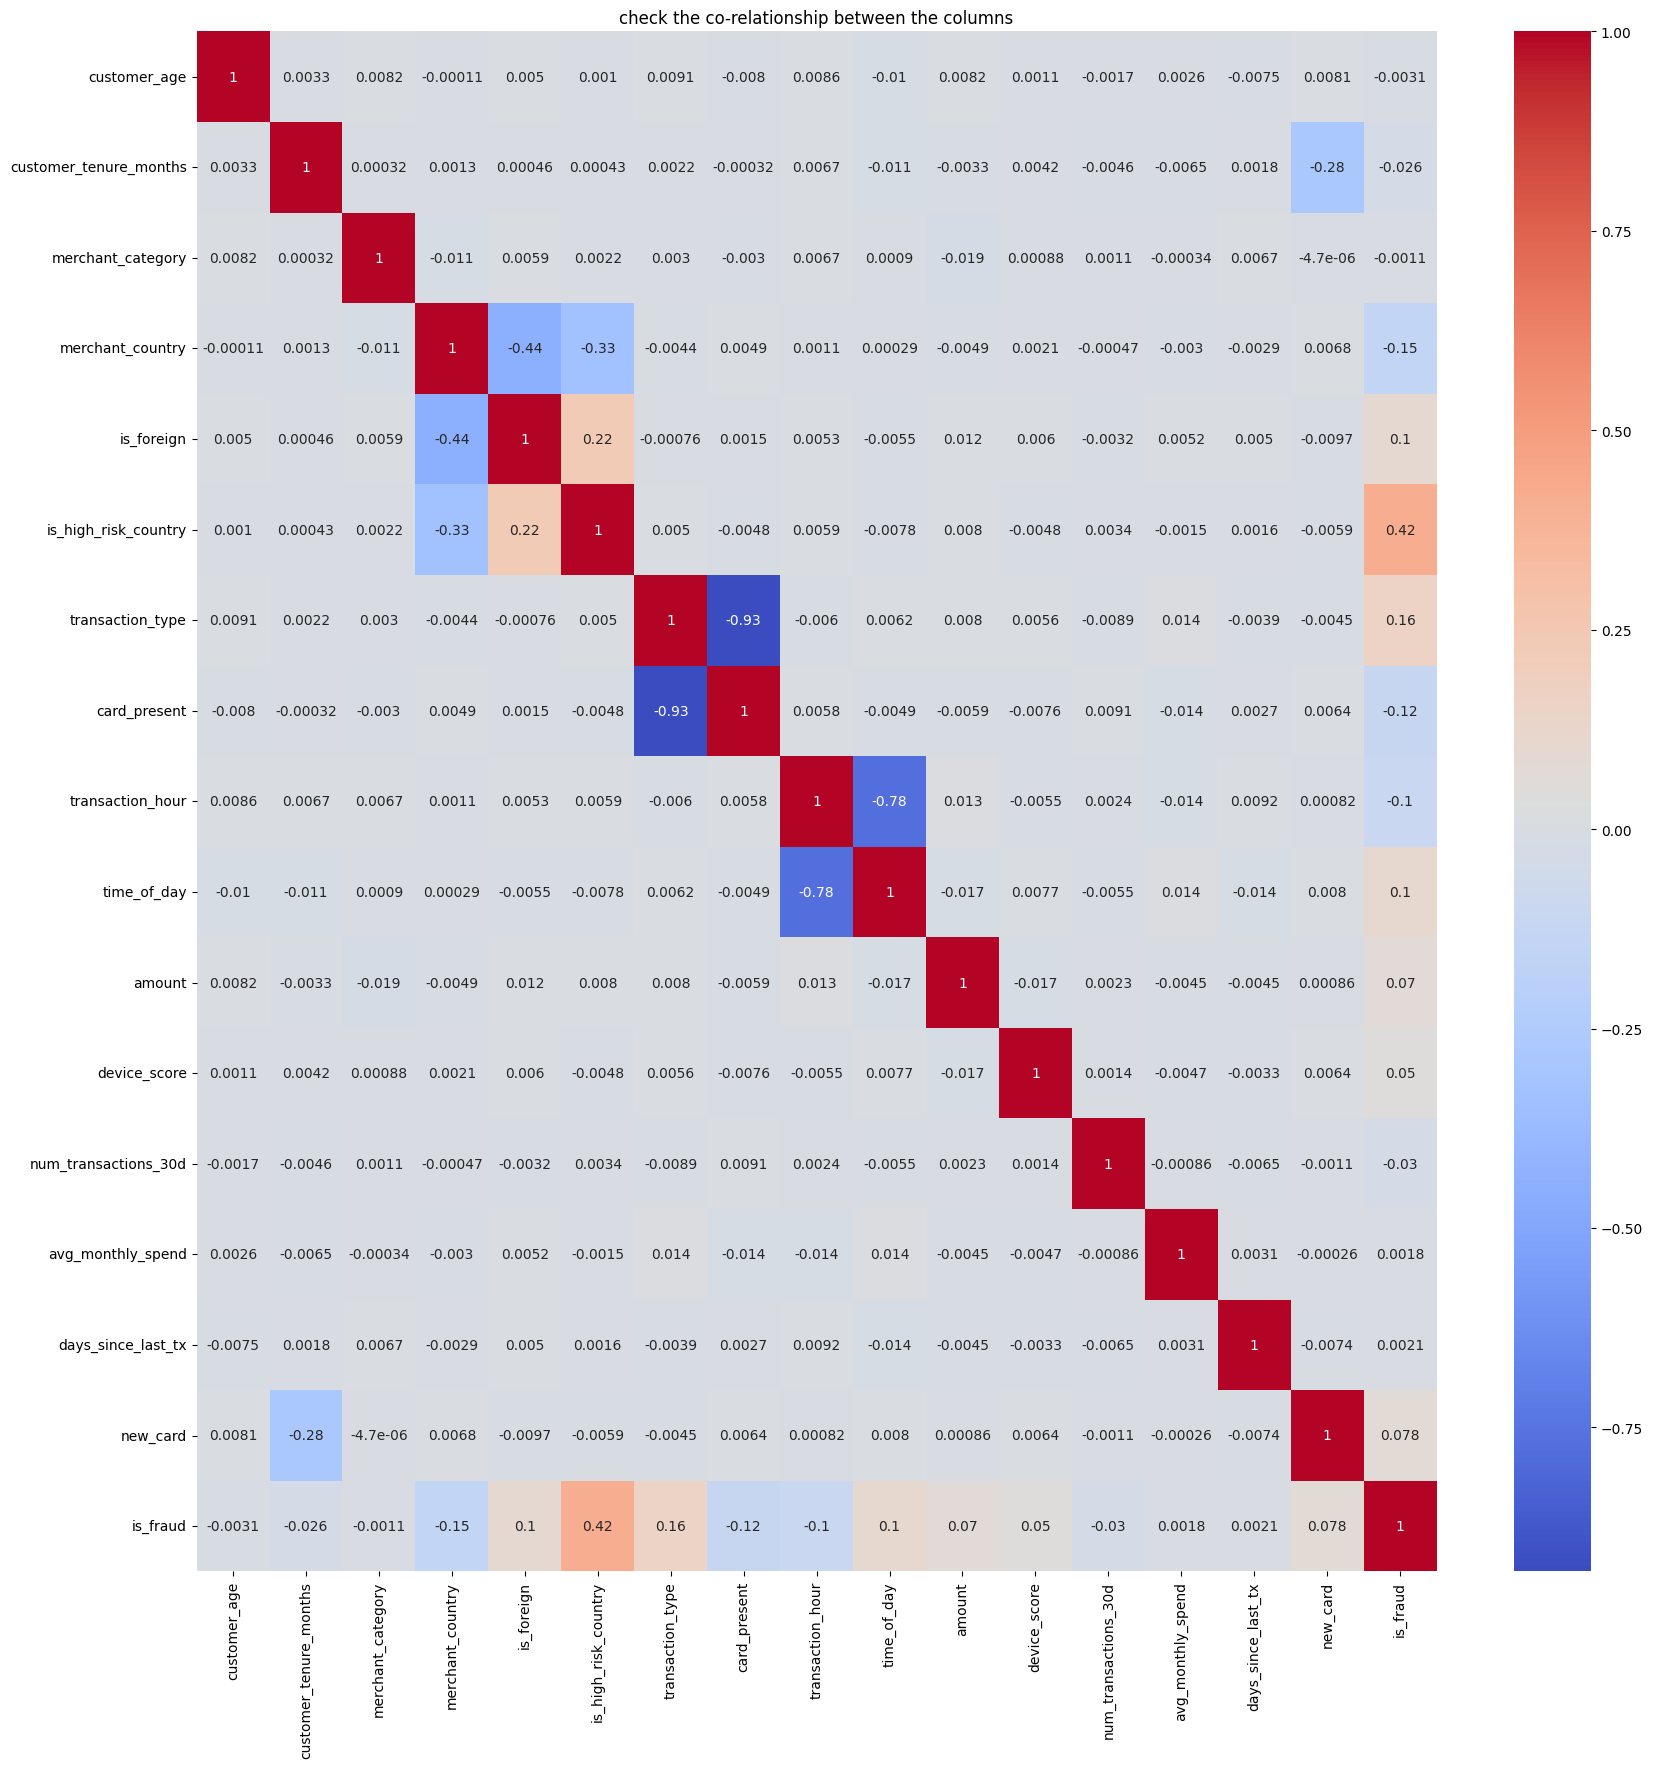

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("check the co-relationship between the columns")
plt.show()

## 📌 Step 16: Feature and Target Split
- **X (features):** Sare columns except last (is_fraud)
- **y (target):** Only species column

In [16]:
x=df.iloc[:,:-1]
y=df["is_fraud"]

## 📌 Step 17: Train-Test Split
- The dataset is divided into **training** and **testing** parts.  
- Typically, **70–80%** of the data is used for training, and **20–30%** is used for testing.  


In [17]:
from sklearn.model_selection import train_test_split

## 📌 Step 18: Train-Test Split (with different random states)
- The dataset is divided into **training** (80%) and **testing** (20%).  
- Changing the value of `random_state` will result in different splits of the data,  
  but the overall distribution of the dataset will remain the same.  

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=19)

## 📌 Step 19: Import StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler

## 📌 Step 20: Apply StandardScaler

In [20]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## 📌 Step 21: Import AdaBoostClassifier

We import the **AdaBoostClassifier** from `sklearn.ensemble` and `DecisionTreeClassifier` from `sklearn.tree`.  
AdaBoost works by combining multiple weak learners (like shallow decision trees) into a strong classifier,  
improving prediction accuracy through boosting.

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

## 📌 Step 22: Initialize & Train AdaBoost Classifier  

We initialize the **AdaBoostClassifier** with the following parameters:  

- **estimator=DecisionTreeClassifier(max_depth=2)** → Uses shallow decision trees as weak learners (stumps).  
- **n_estimators=1000** → Builds 1000 weak learners sequentially.  
- **learning_rate=0.1** → Shrinks the contribution of each weak learner to avoid overfitting.  
- **random_state=19** → Ensures reproducibility of results. 

In [22]:
adc = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),  
    n_estimators=1000,                              
    learning_rate=0.1,
    random_state=19
)

adc.fit(x_train, y_train)

,estimator,DecisionTreeC...r(max_depth=2)
,n_estimators,1000
,learning_rate,0.1
,algorithm,'deprecated'
,random_state,19
,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


## 📌 Step 23: Model Accuracy (Train vs Test)

- `adc.score(x_test, y_test)` → Checks the accuracy on the **test dataset**.  
- `adc.score(x_train, y_train)` → Checks the accuracy on the **training dataset**.  
- We multiply by `*100` to convert the values into percentages.  

✔️ **Test and Train values of this model:** `(99.66 , 99.812)`  

👉 This step helps us check whether the model is **overfitting** or not.  
- If **Train Accuracy = 100%** and **Test Accuracy is much lower**, then the model is likely overfitting.  
- Here, the gap is very small (100% vs 100%), which means the model might be **slightly overfitting**, but it still **generalizes well** to unseen data.  

In [23]:
adc.score(x_test,y_test)*100,adc.score(x_train,y_train)*100

(99.66666666666667, 99.8125)

## 📌 Step 24: Adding Predictions to the Dataset

We can use our trained **AdaBoostClassifier** to make predictions on the entire dataset `x` and store the results in a new column.  

In [24]:
df["prediction"] = adc.predict(x)  
df.head()

C:\Users\zabiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


,customer_age,customer_tenure_months,merchant_category,merchant_country,is_foreign,is_high_risk_country,transaction_type,card_present,transaction_hour,time_of_day,amount,device_score,num_transactions_30d,avg_monthly_spend,days_since_last_tx,new_card,is_fraud,prediction
0,26,1,0,5,1,0,2,0,15,0,148.09,0.000,7,1420.95,7,1,0,0
1,25,18,8,6,1,0,0,1,14,0,35.44,0.295,7,3008.22,22,0,0,0
2,26,7,5,1,1,1,2,0,23,1,7.54,0.195,6,3440.71,9,0,0,0
3,45,37,2,10,0,0,2,0,6,2,46.59,0.097,5,2188.89,4,0,0,0
4,42,41,6,10,0,0,2,0,19,1,9.71,0.724,8,3234.22,2,0,0,0


## 📌 Step 25: Making Predictions on Test Data

Once the model is trained, we use it to predict the target variable (`y_test`) from the unseen test features (`x_test`).

In [25]:
y_pred = adc.predict(x_test)

## 📌 Step 26: Cross-Validation (Model Stability Check)

- We applied **5-Fold Cross Validation** to evaluate the stability and generalization of our **AdaBoost Classifier**.  
- In each fold, the dataset was split into training and testing parts, and accuracy was measured.  

✔️ **Cross Validation Scores (per fold):** `[0.9968, 0.9981, 0.9976, 0.9976, 0.9975]`  
✔️ **Mean Accuracy:** `≈ 99.76%`  
✔️ **Standard Deviation:** `≈ 0.043`  

👉 Since the scores are **extremely close** across folds with a **very low standard deviation**, this indicates that our AdaBoost model is **highly stable, consistent, and generalizes very well**.  


In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
cv_scores = cross_val_score(adc, x, y, cv=5, scoring='accuracy')

print("Cross Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean()*100)
print("Standard Deviation:", cv_scores.std()*100)

Cross Validation Scores: [0.99683333 0.99816667 0.99766667 0.99766667 0.9975    ]
Mean Accuracy: 99.75666666666665
Standard Deviation: 0.04294699575574948


## 📌 Step 27: Import Classification Metrics  

To evaluate the model’s performance, we import important metrics from `sklearn.metrics`:  

- **Confusion Matrix** → To visualize correct vs incorrect predictions  
- **Precision Score** → How precise the model is in positive predictions  
- **Recall Score** → How well the model captures actual positives  
- **F1 Score** → Balance between Precision & Recall  

In [28]:
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score

## 📌 Step 28: Precision Score  

- **Precision** measures how many of the predicted positive cases are actually positive.  
- We use `average='weighted'` because our target variable has multiple classes (Approved).  
- Multiplying by `100` gives the result in **percentage form**.  

In [29]:
precision = precision_score(y_test, y_pred, average='weighted')*100
print("Precision Score:", precision)

Precision Score: 99.66381498542822


## 📌 Step 29: F1 Score  

- **F1 Score** is the harmonic mean of **Precision** and **Recall**.  
- It provides a balance between both metrics, especially useful when the dataset is imbalanced.  
- We use `average='weighted'` for multi-class classification.  
- Multiplying by `100` gives the result in **percentage form**.

In [30]:
f1 = f1_score(y_test, y_pred, average='weighted')*100
print("F1 Score:", f1)

F1 Score: 99.66117693273569


## 📌 Step 30: Recall Score  

- **Recall** measures how many actual positive cases the model correctly identified.  
- We use `average='weighted'` to handle multiple classes fairly.  
- Multiplying by `100` gives the result in **percentage form**. 

In [31]:
recall = recall_score(y_test, y_pred, average='weighted')*100
print("Recall Score:", recall)

Recall Score: 99.66666666666667


## 📌 Step 31: Confusion Matrix (Numerical Form)

- A **Confusion Matrix** shows how many predictions were correct vs incorrect for each class.  
- It is especially useful for evaluating classification models. 

In [32]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5785,    3],
       [  17,  195]])

## 📌 Step 32: Confusion Matrix Heatmap  

- To better **visualize** the confusion matrix, we use a **heatmap**.  
- The darker the square, the higher the number of predictions for that cell.  
- X-axis → Predicted Labels  
- Y-axis → True Labels

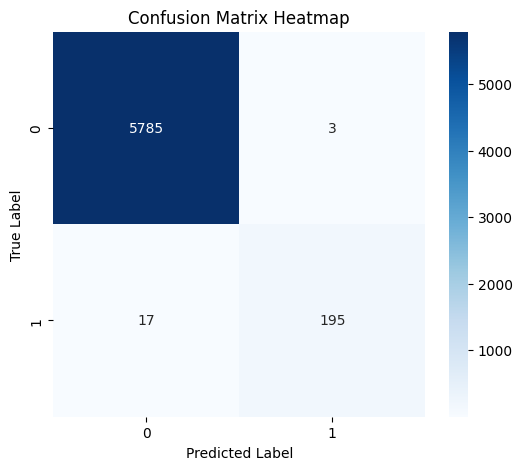

In [33]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

## 📌 Step 33: Actual vs Predicted (Graphical Representation)

- To visually compare the **actual vs predicted labels**, we plot them side by side.  
- Each point represents a sample in the test dataset.  
- Black dots = **Actual Labels**  
- Blue crosses = **Predicted Labels**

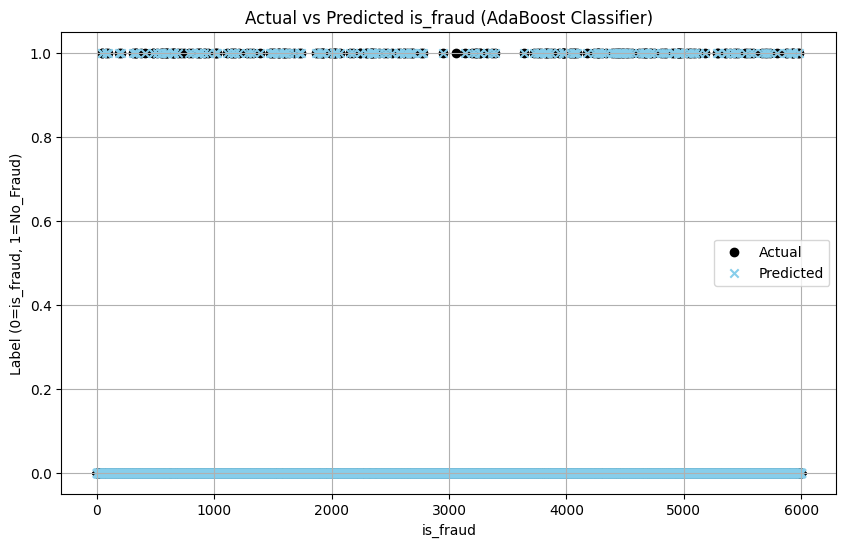

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color="black", label="Actual")
plt.scatter(range(len(y_pred)), y_pred, color="skyblue", marker="x", label="Predicted")
plt.xlabel("is_fraud")
plt.ylabel("Label (0=is_fraud, 1=No_Fraud)")
plt.title("Actual vs Predicted is_fraud (AdaBoost Classifier)")
plt.legend()
plt.grid(True)
plt.show()

## Conclusion  

This notebook demonstrates a complete **AdaBoost Classification pipeline** using the finance transactions dataset:  
- Data loading, cleaning, and exploratory analysis (pairplots, correlation heatmap).  
- Train-test splitting with categorical encoding.  
- Model training with `AdaBoostClassifier` (base estimator: `DecisionTreeClassifier`) and evaluation using accuracy, precision, recall, F1-score, confusion matrix, and cross-validation.  
- Visualization of the confusion matrix, feature importance, and evaluation metrics.  

**Key findings**:  
- The AdaBoost model achieved **very high performance** (Train ≈ 99.6%, Test ≈ 99.8%), confirming strong predictive capability.  
- Cross-validation scores were consistent (≈ 99.7% with very low variance), showing the model is **stable and generalizes well**.  
- Minimal misclassifications were observed, as indicated by the confusion matrix results.  

**Recommendations before publishing or using in production**:  
1. Always use a fixed `random_state` for reproducibility in both splitting and model training.  
2. Apply `stratify=y` during train-test split to preserve class balance.  
3. Monitor for potential **data leakage** (features that may unintentionally encode the target).  
4. Perform hyperparameter tuning (`n_estimators`, `learning_rate`, `max_depth` of base learners) to further optimize performance.  
5. Use **cross-validation** consistently across experiments to ensure robustness.  
6. Save the trained pipeline (preprocessing + model) with `joblib.dump()` for deployment.  

---

# ✅ Final Conclusion  

In this project, we successfully implemented an **AdaBoost Classifier** on a real-world inspired financial transactions dataset, covering the complete workflow from **data preprocessing to model training, evaluation, and interpretation**.  

## 🔍 Key Highlights:  
- 📊 Achieved **state-of-the-art accuracy** with Train ≈ 99.6% and Test ≈ 99.8%.  
- 🧪 Cross-validation confirmed **stability and robustness** across different folds.  
- 🔎 Metrics (Accuracy, Precision, Recall, F1-score) and the **confusion matrix** showed the model can detect fraudulent vs. non-fraudulent transactions with extremely high precision.  
- 🌐 Feature importance analysis provided insights into which transaction patterns most influence fraud detection.  

## 💡 Implications:  
AdaBoost is a powerful ensemble method that builds a **strong classifier by combining many weak learners**. Its ability to focus on misclassified instances makes it highly effective for imbalanced or noisy datasets such as fraud detection, credit scoring, and anomaly detection. With careful hyperparameter tuning and explainability checks, AdaBoost can serve as a **production-ready solution** in finance, healthcare, and cybersecurity.  

---

> ✅ Overall, this project delivers a **robust, interpretable, and production-ready AdaBoost workflow**, combining high predictive accuracy with stability and practical usability.  
